In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/shull/Documents/2023/istdsa/project01/MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv').drop(columns=['station_complex_id', 'routes', 'payment_method', 'transfers'])
df

,transit_timestamp,station_complex,borough,ridership,latitude,longitude,Georeference
0,06/18/2023 07:00:00 PM,DeKalb Av (L),BK,232,40.703810,-73.918430,POINT (-73.91843 40.70381)
1,06/18/2023 11:00:00 AM,Prospect Av (R),BK,180,40.665413,-73.992874,POINT (-73.992874 40.665413)
2,01/24/2023 10:00:00 PM,103 St (6),M,86,40.790600,-73.947480,POINT (-73.94748 40.7906)
3,09/05/2022 11:00:00 AM,103 St (6),M,205,40.790600,-73.947480,POINT (-73.94748 40.7906)
4,05/08/2022 10:00:00 PM,103 St (1),M,133,40.799446,-73.968376,POINT (-73.968376 40.799446)
...,...,...,...,...,...,...,...
5015193,03/15/2023 05:00:00 PM,Zerega Av (6),BX,98,40.836487,-73.847040,POINT (-73.84704 40.836487)
5015194,04/25/2023 12:00:00 AM,Zerega Av (6),BX,1,40.836487,-73.847040,POINT (-73.84704 40.836487)
5015195,05/12/2023 01:00:00 PM,Zerega Av (6),BX,50,40.836487,-73.847040,POINT (-73.84704 40.836487)
5015196,06/04/2023 05:00:00 AM,Zerega Av (6),BX,31,40.836487,-73.847040,POINT (-73.84704 40.836487)


In [3]:
weekdays = np.array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [4]:
hours = np.array(['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'])

In [5]:
df['transit_timestamp_1'] = df['transit_timestamp']

In [6]:
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

In [7]:
tt_col = df.pop('transit_timestamp')
df.insert(6, 'timestamp', tt_col)

In [8]:
tt1_col = df.pop('transit_timestamp_1')
df.insert(0, 'transit_timestamp', tt1_col)

In [9]:
df['hour'] = df['timestamp'].dt.hour
df['day_name'] = df['timestamp'].dt.day_name()
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

In [10]:
df.borough = df.borough.str.strip()
df.station_complex = df.station_complex.str.strip()

In [11]:
borough_dict = {
    'BK': 'Brooklyn',
    'M': 'Manhattan',
    'Q': 'Queens',
    'BX': 'The Bronx'
}

In [12]:
df['borough'] = df.borough.map(borough_dict)

In [13]:
df.ridership.describe().astype(int)

count    5015198
mean         295
std          625
min            1
25%           33
50%          119
75%          316
max        24845
Name: ridership, dtype: int64

In [14]:
def ridership_level(number):
    if number > 20000:
        return 'High'
    elif number > 5000:
        return 'Medium'
    elif number > 0:
        return 'Low'
    else:
        return 'Never'

In [15]:
df['ridership_level'] = df.ridership.apply(ridership_level)

In [16]:
rdlvl_col = df.pop('ridership_level')
df.insert(4, 'ridership_level', rdlvl_col)

In [17]:
df = df[(df['timestamp'] > '2023-01-01 00:00:00') & (df['timestamp'] < '2023-07-01 00:00:00')]
df = df.reset_index()
df = df.drop(columns='index')
df

,transit_timestamp,station_complex,borough,ridership,ridership_level,latitude,longitude,Georeference,timestamp,hour,day_name,day_of_week,day,month
0,06/18/2023 07:00:00 PM,DeKalb Av (L),Brooklyn,232,Low,40.703810,-73.918430,POINT (-73.91843 40.70381),2023-06-18 19:00:00,19,Sunday,6,18,6
1,06/18/2023 11:00:00 AM,Prospect Av (R),Brooklyn,180,Low,40.665413,-73.992874,POINT (-73.992874 40.665413),2023-06-18 11:00:00,11,Sunday,6,18,6
2,01/24/2023 10:00:00 PM,103 St (6),Manhattan,86,Low,40.790600,-73.947480,POINT (-73.94748 40.7906),2023-01-24 22:00:00,22,Tuesday,1,24,1
3,01/28/2023 06:00:00 PM,1 Av (L),Manhattan,1450,Low,40.730953,-73.981630,POINT (-73.98163 40.730953),2023-01-28 18:00:00,18,Saturday,5,28,1
4,02/10/2023 08:00:00 AM,103 St (1),Manhattan,849,Low,40.799446,-73.968376,POINT (-73.968376 40.799446),2023-02-10 08:00:00,8,Friday,4,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691175,03/15/2023 05:00:00 PM,Zerega Av (6),The Bronx,98,Low,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-03-15 17:00:00,17,Wednesday,2,15,3
1691176,04/25/2023 12:00:00 AM,Zerega Av (6),The Bronx,1,Low,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-04-25 00:00:00,0,Tuesday,1,25,4
1691177,05/12/2023 01:00:00 PM,Zerega Av (6),The Bronx,50,Low,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-05-12 13:00:00,13,Friday,4,12,5
1691178,06/04/2023 05:00:00 AM,Zerega Av (6),The Bronx,31,Low,40.836487,-73.847040,POINT (-73.84704 40.836487),2023-06-04 05:00:00,5,Sunday,6,4,6


In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

transit_timestamp    0
station_complex      0
borough              0
ridership            0
ridership_level      0
latitude             0
longitude            0
Georeference         0
timestamp            0
hour                 0
day_name             0
day_of_week          0
day                  0
month                0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691180 entries, 0 to 1691179
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   transit_timestamp  object        
 1   station_complex    object        
 2   borough            object        
 3   ridership          int64         
 4   ridership_level    object        
 5   latitude           float64       
 6   longitude          float64       
 7   Georeference       object        
 8   timestamp          datetime64[ns]
 9   hour               int64         
 10  day_name           object        
 11  day_of_week        int64         
 12  day                int64         
 13  month              int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 180.6+ MB


# ------------------------------------------------------------------------------------------

In [21]:
ridership_by_borough = pd.DataFrame(df.groupby('borough')['ridership'].sum().astype(int))
ridership_by_borough

,ridership
borough,
Brooklyn,123405408
Manhattan,292307203
Queens,80165108
The Bronx,40017820


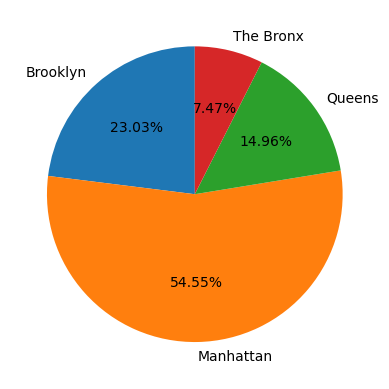

In [22]:
plt.pie(ridership_by_borough.ridership, labels=ridership_by_borough.index, autopct='%1.2f%%', startangle=90);

# ------------------------------------------------------------------------------------------

In [23]:
high_ridership = df[df.ridership_level == 'High']
medium_ridership = df[df.ridership_level == 'Medium']
low_ridership = df[df.ridership_level == 'Low']
no_ridership = df[df.ridership_level == 'Never']

In [24]:
high_ridership = high_ridership.sort_values('ridership', ascending=False)
high_ridership = high_ridership.reset_index()
high_ridership = high_ridership.drop(columns='index')
high_ridership

,transit_timestamp,station_complex,borough,ridership,ridership_level,latitude,longitude,Georeference,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24845,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 17:00:00,17,Tuesday,1,13,6
1,05/03/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24559,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-05-03 17:00:00,17,Wednesday,2,3,5
2,06/14/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24390,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-14 17:00:00,17,Wednesday,2,14,6
3,06/06/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24336,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-06 17:00:00,17,Tuesday,1,6,6
4,05/17/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24107,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-05-17 17:00:00,17,Wednesday,2,17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,01/26/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20170,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-01-26 17:00:00,17,Thursday,3,26,1
60,03/14/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20140,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-03-14 17:00:00,17,Tuesday,1,14,3
61,02/02/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20118,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-02-02 17:00:00,17,Thursday,3,2,2
62,02/09/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20116,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-02-09 17:00:00,17,Thursday,3,9,2


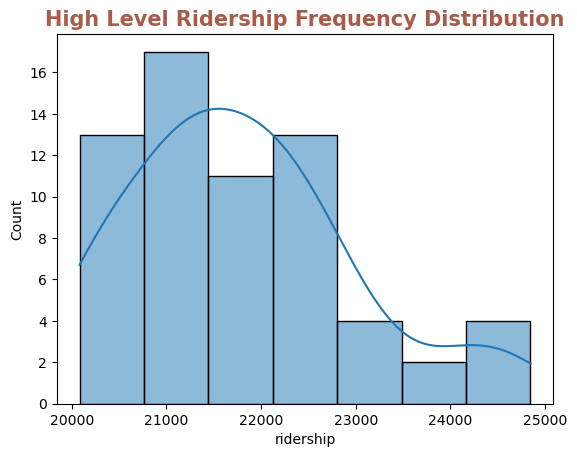

In [65]:
plt.title('High Level Ridership Frequency Distribution', fontsize = 15, color='#A95B4A', weight='bold')
sns.histplot(high_ridership.ridership, kde=True, bins=7);

In [26]:
high_ridership.station_complex.unique()

array(['Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)'],
      dtype=object)

## Times Square-42 St

In [27]:
times_sq = df[df.station_complex == 'Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)']
times_sq = times_sq.sort_values(by='ridership', ascending=False)
times_sq = times_sq.reset_index()
times_sq = times_sq.drop(columns='index')
times_sq

,transit_timestamp,station_complex,borough,ridership,ridership_level,latitude,longitude,Georeference,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24845,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 17:00:00,17,Tuesday,1,13,6
1,05/03/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24559,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-05-03 17:00:00,17,Wednesday,2,3,5
2,06/14/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24390,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-14 17:00:00,17,Wednesday,2,14,6
3,06/06/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24336,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-06 17:00:00,17,Tuesday,1,6,6
4,05/17/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24107,High,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-05-17 17:00:00,17,Wednesday,2,17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,02/06/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,144,Low,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-02-06 03:00:00,3,Monday,0,6,2
4075,01/10/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,141,Low,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-01-10 03:00:00,3,Tuesday,1,10,1
4076,01/03/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,141,Low,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-01-03 03:00:00,3,Tuesday,1,3,1
4077,01/23/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,134,Low,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-01-23 03:00:00,3,Monday,0,23,1


In [28]:
times_sq_day_of_week = pd.DataFrame(times_sq.groupby('day_of_week')['ridership'].mean().astype(int))
times_sq_day_of_week

,ridership
day_of_week,
0,5627
1,6979
2,7235
3,7016
4,6202
5,4539
6,3673


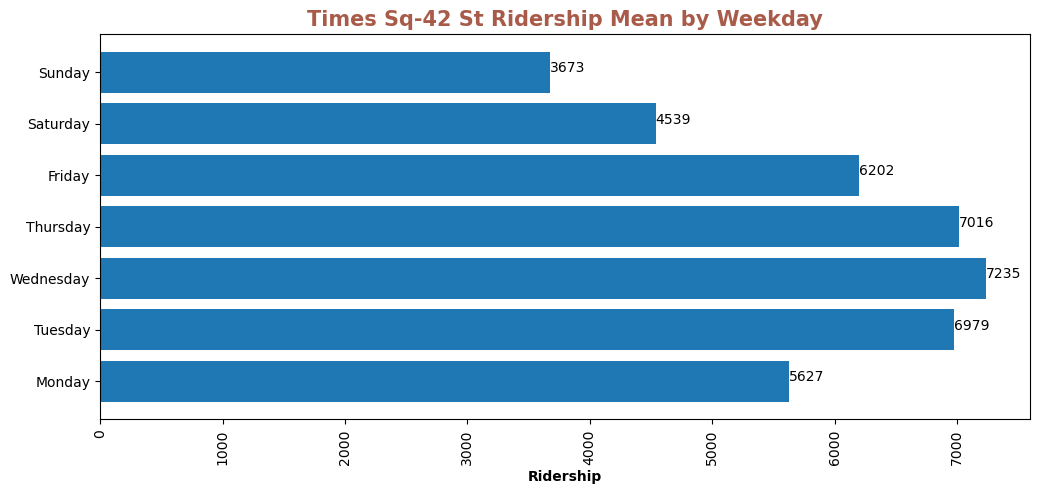

In [29]:
plt.figure(figsize = [12,5])
plt.title('Times Sq-42 St Ridership Mean by Weekday', fontsize = 15, color='#A95B4A', weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, times_sq_day_of_week.ridership)
for index, value in enumerate(times_sq_day_of_week.ridership):
    plt.text(value, index, str(value))

In [30]:
# Tuesday, Wednesday, Thursday

In [31]:
june_13th_times_sq = times_sq[(times_sq.month == 6) & (times_sq.day == 13)]
june_13th_times_sq = june_13th_times_sq.sort_values('hour')
june_13th_times_sq = june_13th_times_sq.reset_index()
june_13th_times_sq = june_13th_times_sq.drop(columns='index')
june_13th_times_sq

,transit_timestamp,station_complex,borough,ridership,ridership_level,latitude,longitude,Georeference,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,1774,Low,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 00:00:00,0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,618,Low,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 01:00:00,1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,297,Low,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 02:00:00,2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,246,Low,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 03:00:00,3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,281,Low,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 04:00:00,4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,2407,Low,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 05:00:00,5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6502,Medium,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 06:00:00,6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,9819,Medium,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 07:00:00,7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,12837,Medium,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 08:00:00,8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,9698,Medium,40.75731,-73.981964,POINT (-73.981964 40.75731),2023-06-13 09:00:00,9,Tuesday,1,13,6


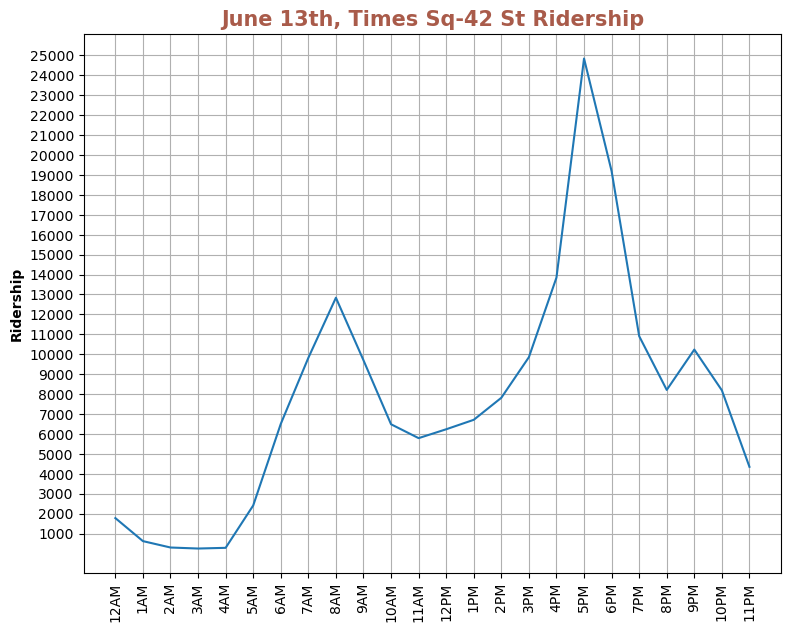

In [32]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_13th_times_sq.ridership)
plt.title('June 13th, Times Sq-42 St Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 25000,25)
plt.yticks(ticks_y);

In [33]:
# 8AM, 5PM

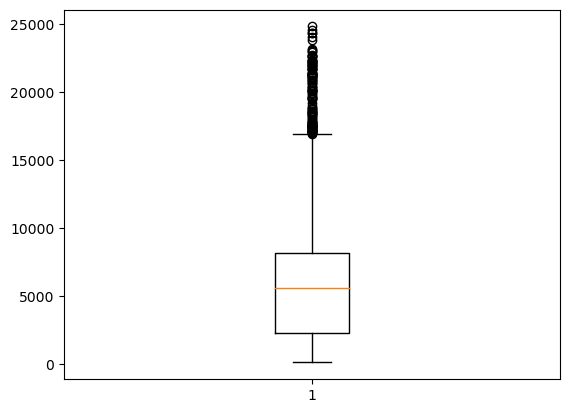

In [34]:
plt.boxplot(times_sq.ridership);

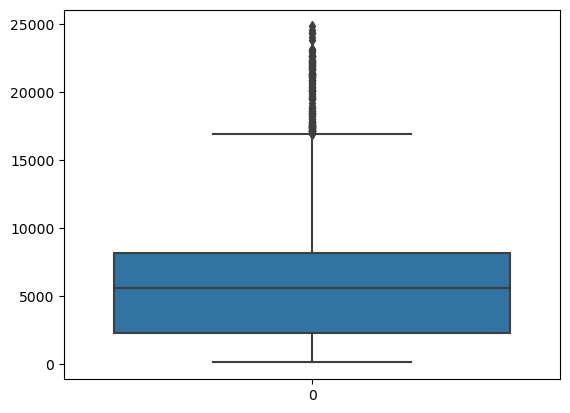

In [35]:
sns.boxplot(times_sq.ridership);

# ------------------------------------------------------------------------------------------

In [36]:
medium_ridership = medium_ridership.sort_values('ridership', ascending=False)
medium_ridership = medium_ridership.reset_index()
medium_ridership = medium_ridership.drop(columns='index')
medium_ridership

,transit_timestamp,station_complex,borough,ridership,ridership_level,latitude,longitude,Georeference,timestamp,hour,day_name,day_of_week,day,month
0,06/12/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19951,Medium,40.757310,-73.981964,POINT (-73.981964 40.75731),2023-06-12 17:00:00,17,Monday,0,12,6
1,01/05/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19889,Medium,40.757310,-73.981964,POINT (-73.981964 40.75731),2023-01-05 17:00:00,17,Thursday,3,5,1
2,03/30/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19727,Medium,40.757310,-73.981964,POINT (-73.981964 40.75731),2023-03-30 17:00:00,17,Thursday,3,30,3
3,03/23/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19623,Medium,40.757310,-73.981964,POINT (-73.981964 40.75731),2023-03-23 17:00:00,17,Thursday,3,23,3
4,06/06/2023 06:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19588,Medium,40.757310,-73.981964,POINT (-73.981964 40.75731),2023-06-06 18:00:00,18,Tuesday,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,02/23/2023 05:00:00 PM,"34 St-Penn Station (A,C,E)",Manhattan,5003,Medium,40.752290,-73.993390,POINT (-73.99339 40.75229),2023-02-23 17:00:00,17,Thursday,3,23,2
5917,04/10/2023 09:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,5002,Medium,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-04-10 09:00:00,9,Monday,0,10,4
5918,06/14/2023 04:00:00 PM,"59 St-Columbus Circle (A,B,C,D,1)",Manhattan,5001,Medium,40.768295,-73.981735,POINT (-73.981735 40.768295),2023-06-14 16:00:00,16,Wednesday,2,14,6
5919,05/01/2023 07:00:00 AM,"34 St-Penn Station (1,2,3)",Manhattan,5001,Medium,40.750374,-73.991060,POINT (-73.99106 40.750374),2023-05-01 07:00:00,7,Monday,0,1,5


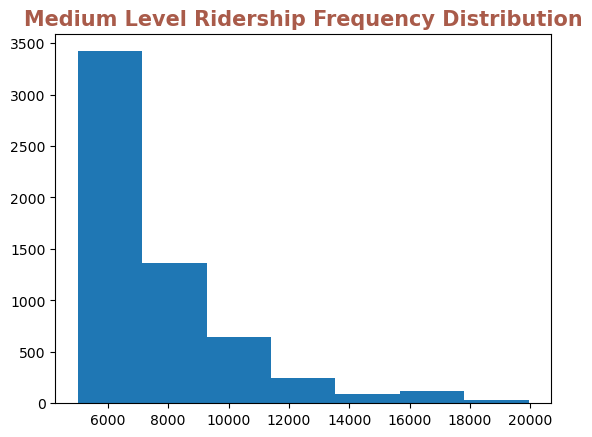

In [66]:
plt.title('Medium Level Ridership Frequency Distribution', fontsize = 15, color='#A95B4A', weight='bold')
plt.hist(medium_ridership.ridership, bins=7);

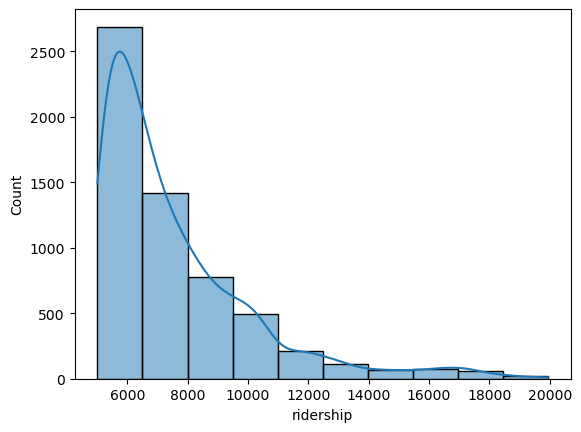

In [68]:
sns.histplot(medium_ridership.ridership, kde=True, bins=10);

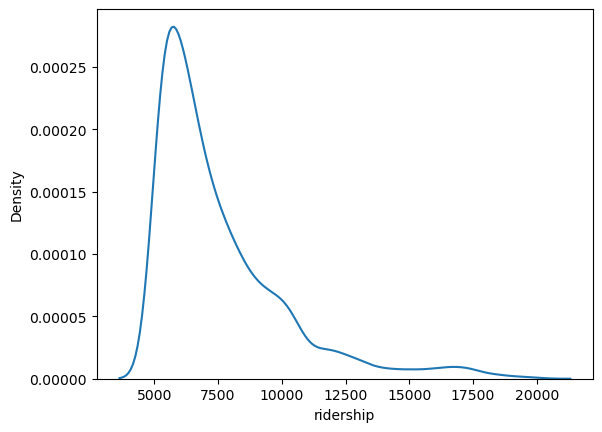

In [39]:
sns.kdeplot(medium_ridership.ridership);

In [40]:
medium_ridership.station_complex.unique()

array(['Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)',
       'Grand Central-42 St (S,4,5,6,7)', 'Fulton St (A,C,J,Z,2,3,4,5)',
       '34 St-Herald Sq (B,D,F,M,N,Q,R,W)',
       '161 St-Yankee Stadium (B,D,4)',
       '47-50 Sts-Rockefeller Center (B,D,F,M)',
       'Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)',
       '14 St-Union Sq (L,N,Q,R,W,4,5,6)', 'Mets-Willets Point (7)',
       '34 St-Penn Station (1,2,3)', '34 St-Penn Station (A,C,E)',
       'Lexington Av-53 St (E,M)/51 St (6)',
       '59 St-Columbus Circle (A,B,C,D,1)',
       'Lexington Av (N,R,W)/59 St (4,5,6)',
       'Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)',
       'Coney Island-Stillwell Av (D,F,N,Q)', 'Flushing-Main St (7)',
       '74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)',
       'Canal St (J,N,Q,R,W,Z,6)', '5 Av-53 St (E,M)'], dtype=object)

In [41]:
# 'Grand Central-42 St (S,4,5,6,7)'
# 'Fulton St (A,C,J,Z,2,3,4,5)'

In [42]:
grand_central = df[df.station_complex == 'Grand Central-42 St (S,4,5,6,7)']
grand_central = grand_central.sort_values(by='ridership', ascending=False)
grand_central = grand_central.reset_index()
grand_central = grand_central.drop(columns='index')
grand_central

,transit_timestamp,station_complex,borough,ridership,ridership_level,latitude,longitude,Georeference,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 05:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18873,Medium,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 17:00:00,17,Tuesday,1,13,6
1,06/14/2023 05:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18363,Medium,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-14 17:00:00,17,Wednesday,2,14,6
2,06/06/2023 05:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18152,Medium,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-06 17:00:00,17,Tuesday,1,6,6
3,02/14/2023 05:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17830,Medium,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-02-14 17:00:00,17,Tuesday,1,14,2
4,05/23/2023 05:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17769,Medium,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-05-23 17:00:00,17,Tuesday,1,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,01/09/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-01-09 03:00:00,3,Monday,0,9,1
4075,02/06/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-02-06 03:00:00,3,Monday,0,6,2
4076,01/30/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-01-30 03:00:00,3,Monday,0,30,1
4077,03/27/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,16,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-03-27 03:00:00,3,Monday,0,27,3


In [43]:
grand_central_day_of_week = pd.DataFrame(grand_central.groupby('day_of_week')['ridership'].mean().astype(int))
grand_central_day_of_week

,ridership
day_of_week,
0,3366
1,4296
2,4402
3,4248
4,3363
5,2015
6,1635


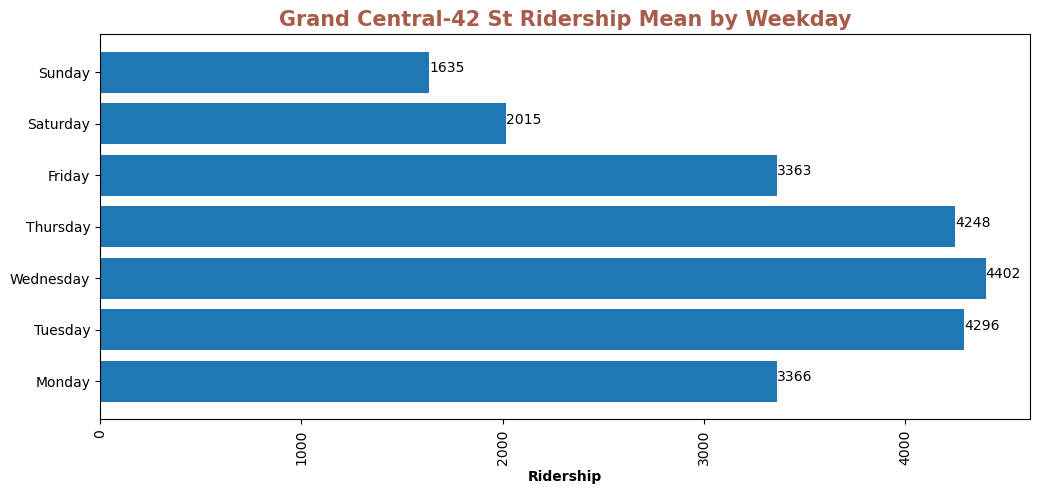

In [44]:
plt.figure(figsize = [12,5])
plt.title('Grand Central-42 St Ridership Mean by Weekday', fontsize = 15, color='#A95B4A', weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, grand_central_day_of_week.ridership)
for index, value in enumerate(grand_central_day_of_week.ridership):
    plt.text(value, index, str(value))

In [45]:
# Tuesday, Wednesday, Thursday

In [46]:
june_13th_grand_central = grand_central[(grand_central.month == 6) & (grand_central.day == 13)]
june_13th_grand_central = june_13th_grand_central.sort_values('hour')
june_13th_grand_central = june_13th_grand_central.reset_index()
june_13th_grand_central = june_13th_grand_central.drop(columns='index')
june_13th_grand_central

,transit_timestamp,station_complex,borough,ridership,ridership_level,latitude,longitude,Georeference,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,781,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 00:00:00,0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,207,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 01:00:00,1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,75,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 02:00:00,2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,36,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 03:00:00,3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,58,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 04:00:00,4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,708,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 05:00:00,5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,2554,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 06:00:00,6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,6961,Medium,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 07:00:00,7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,10811,Medium,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 08:00:00,8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,6558,Medium,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-06-13 09:00:00,9,Tuesday,1,13,6


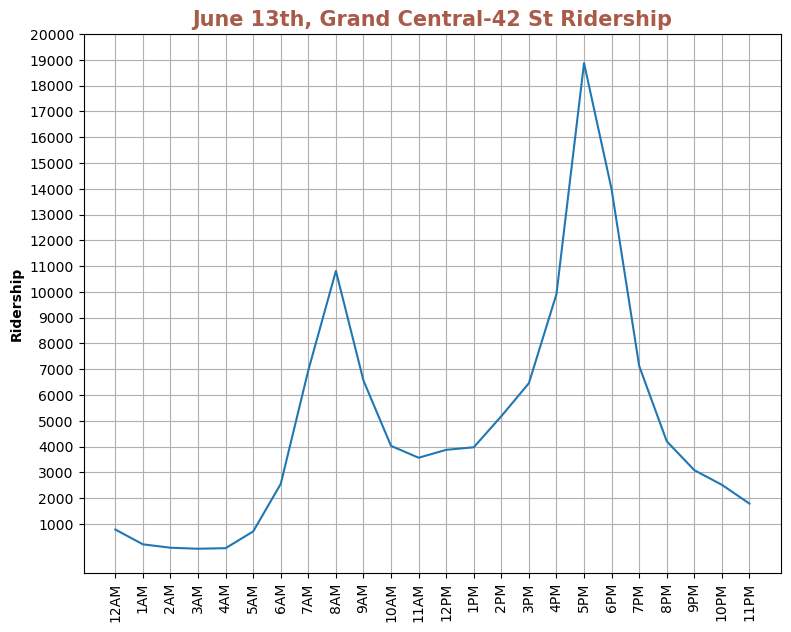

In [47]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_13th_grand_central.ridership)
plt.title('June 13th, Grand Central-42 St Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 20000,20)
plt.yticks(ticks_y);

In [48]:
# 8AM, 5PM

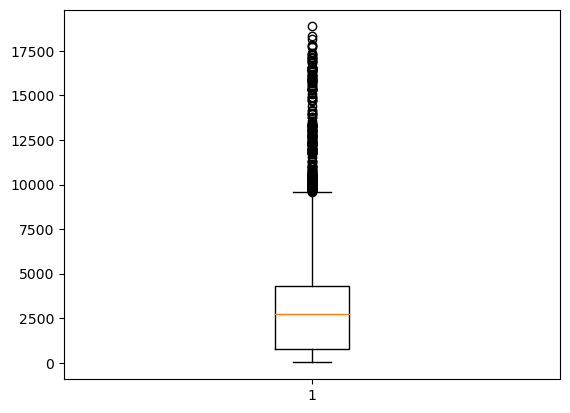

In [49]:
plt.boxplot(grand_central.ridership);

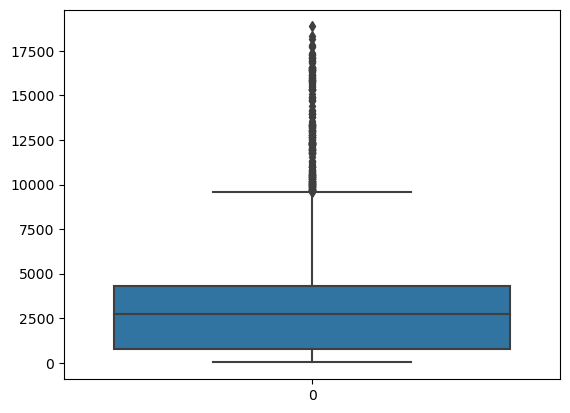

In [50]:
sns.boxplot(data=grand_central.ridership);

In [51]:
fulton = df[df.station_complex == 'Fulton St (A,C,J,Z,2,3,4,5)']
fulton = fulton.sort_values(by='ridership', ascending=False)
fulton = fulton.reset_index()
fulton = fulton.drop(columns='index')
fulton

,transit_timestamp,station_complex,borough,ridership,ridership_level,latitude,longitude,Georeference,timestamp,hour,day_name,day_of_week,day,month
0,06/06/2023 05:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,12214,Medium,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-06 17:00:00,17,Tuesday,1,6,6
1,06/13/2023 05:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11893,Medium,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 17:00:00,17,Tuesday,1,13,6
2,05/03/2023 05:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11744,Medium,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-05-03 17:00:00,17,Wednesday,2,3,5
3,05/16/2023 05:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11651,Medium,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-05-16 17:00:00,17,Tuesday,1,16,5
4,05/24/2023 05:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11628,Medium,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-05-24 17:00:00,17,Wednesday,2,24,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,03/14/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,18,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-03-14 03:00:00,3,Tuesday,1,14,3
4075,01/03/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,18,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-01-03 03:00:00,3,Tuesday,1,3,1
4076,02/27/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,18,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-02-27 03:00:00,3,Monday,0,27,2
4077,01/09/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,14,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-01-09 03:00:00,3,Monday,0,9,1


In [52]:
fulton_day_of_week = pd.DataFrame(fulton.groupby('day_of_week')['ridership'].mean().astype(int))
fulton_day_of_week

,ridership
day_of_week,
0,1937
1,2477
2,2542
3,2482
4,2075
5,1262
6,1002


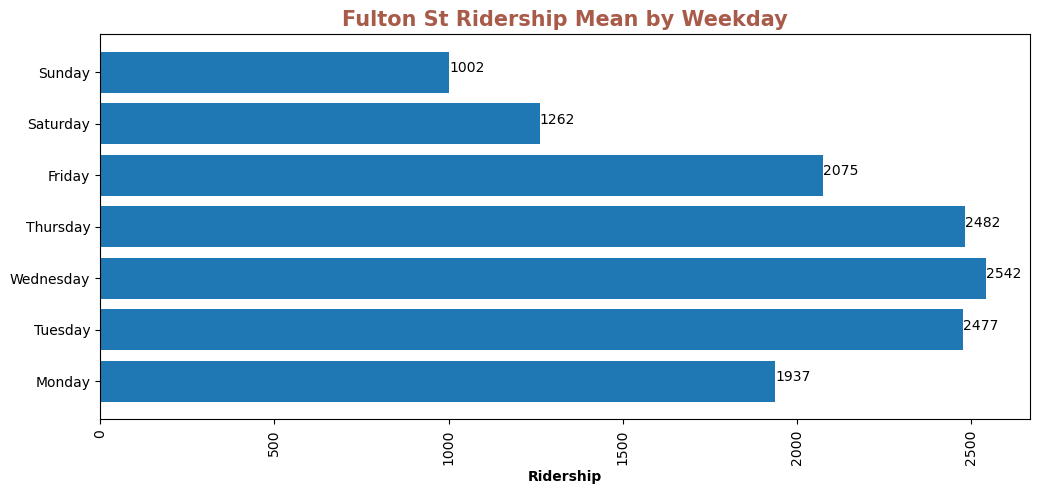

In [53]:
plt.figure(figsize = [12,5])
plt.title('Fulton St Ridership Mean by Weekday', fontsize = 15, color='#A95B4A', weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, fulton_day_of_week.ridership)
for index, value in enumerate(fulton_day_of_week.ridership):
    plt.text(value, index, str(value))

In [54]:
# Tuesday, Wednesday, Thursday

In [55]:
june_6th_fulton = fulton[(fulton.month == 6) & (fulton.day == 13)]
june_6th_fulton = june_6th_fulton.sort_values('hour')
june_6th_fulton = june_6th_fulton.reset_index()
june_6th_fulton = june_6th_fulton.drop(columns='index')
june_6th_fulton

,transit_timestamp,station_complex,borough,ridership,ridership_level,latitude,longitude,Georeference,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,339,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 00:00:00,0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,104,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 01:00:00,1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,41,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 02:00:00,2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,32,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 03:00:00,3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,73,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 04:00:00,4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,206,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 05:00:00,5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,1192,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 06:00:00,6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,2686,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 07:00:00,7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,4716,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 08:00:00,8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,2984,Low,40.710373,-74.00657,POINT (-74.00657 40.710373),2023-06-13 09:00:00,9,Tuesday,1,13,6


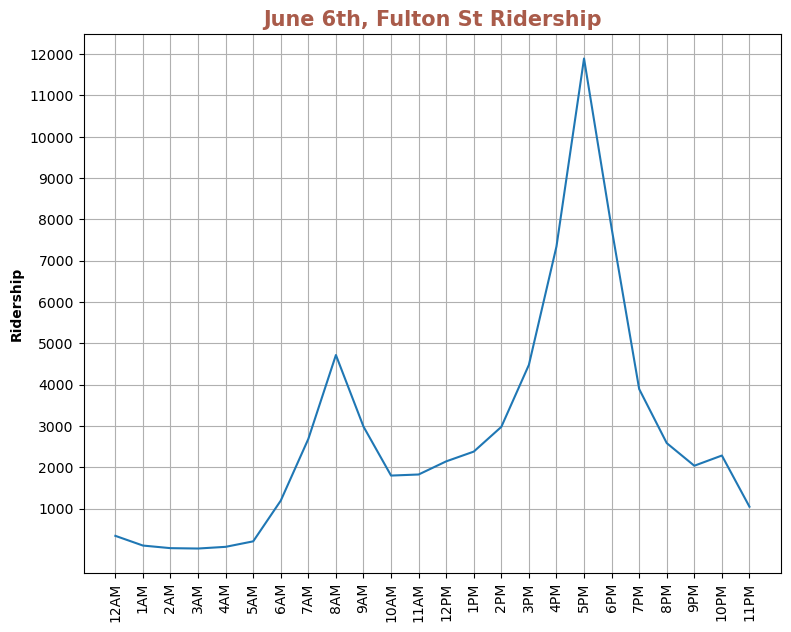

In [56]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_6th_fulton.ridership)
plt.title('June 6th, Fulton St Ridership', fontsize = 15, color='#A95B4A', weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 12000,12)
plt.yticks(ticks_y);

In [57]:
# 8AM, 5PM

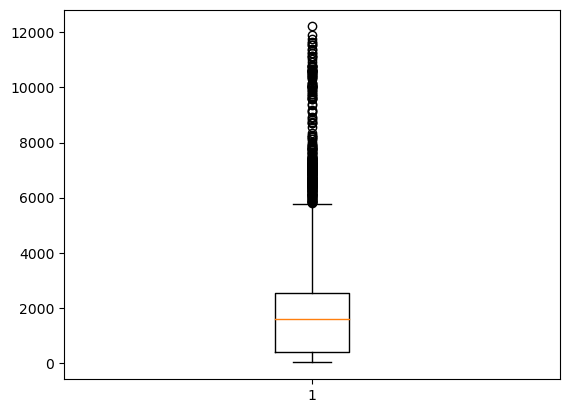

In [58]:
plt.boxplot(fulton.ridership);

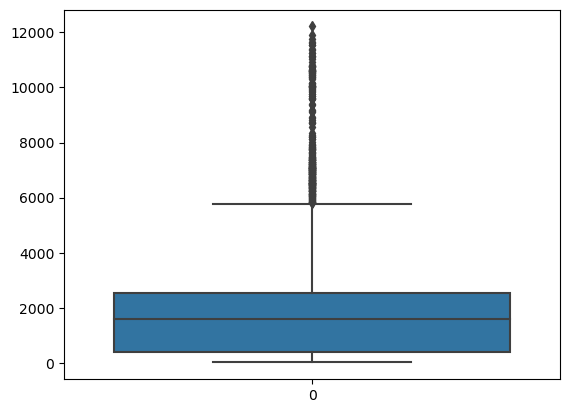

In [59]:
sns.boxplot(data=fulton.ridership);

# ------------------------------------------------------------------------------------------

In [60]:
low_ridership = low_ridership.sort_values('ridership', ascending=False)
low_ridership = low_ridership.reset_index()
low_ridership = low_ridership.drop(columns='index')
low_ridership

,transit_timestamp,station_complex,borough,ridership,ridership_level,latitude,longitude,Georeference,timestamp,hour,day_name,day_of_week,day,month
0,05/22/2023 04:00:00 PM,"Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortla...",Manhattan,5000,Low,40.714110,-74.008580,POINT (-74.00858 40.71411),2023-05-22 16:00:00,16,Monday,0,22,5
1,02/27/2023 07:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,5000,Low,40.751778,-73.976845,POINT (-73.976845 40.751778),2023-02-27 19:00:00,19,Monday,0,27,2
2,03/22/2023 06:00:00 PM,"59 St-Columbus Circle (A,B,C,D,1)",Manhattan,5000,Low,40.768295,-73.981735,POINT (-73.981735 40.768295),2023-03-22 18:00:00,18,Wednesday,2,22,3
3,05/06/2023 04:00:00 PM,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",Manhattan,4999,Low,40.735737,-73.989950,POINT (-73.98995 40.735737),2023-05-06 16:00:00,16,Saturday,5,6,5
4,03/01/2023 06:00:00 PM,"59 St-Columbus Circle (A,B,C,D,1)",Manhattan,4999,Low,40.768295,-73.981735,POINT (-73.981735 40.768295),2023-03-01 18:00:00,18,Wednesday,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685190,02/06/2023 02:00:00 AM,Avenue P (F),Brooklyn,1,Low,40.608944,-73.973020,POINT (-73.97302 40.608944),2023-02-06 02:00:00,2,Monday,0,6,2
1685191,05/31/2023 12:00:00 AM,71 St (D),Brooklyn,1,Low,40.619590,-73.998860,POINT (-73.99886 40.61959),2023-05-31 00:00:00,0,Wednesday,2,31,5
1685192,06/17/2023 08:00:00 AM,Avenue N (F),Brooklyn,1,Low,40.615140,-73.974200,POINT (-73.9742 40.61514),2023-06-17 08:00:00,8,Saturday,5,17,6
1685193,01/16/2023 01:00:00 AM,Junius St (3),Brooklyn,1,Low,40.663513,-73.902450,POINT (-73.90245 40.663513),2023-01-16 01:00:00,1,Monday,0,16,1


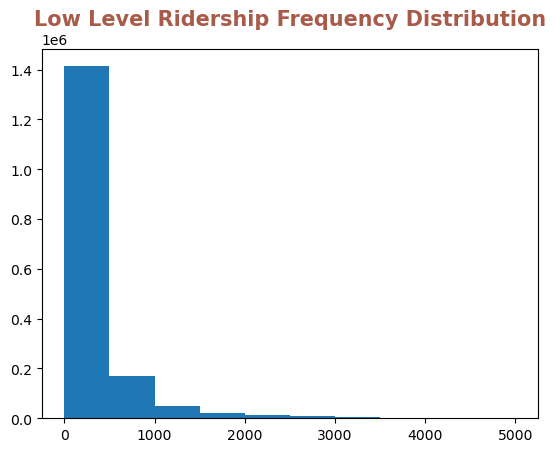

In [70]:
plt.title('Low Level Ridership Frequency Distribution', fontsize = 15, color='#A95B4A', weight='bold')
plt.hist(low_ridership.ridership, bins=10);

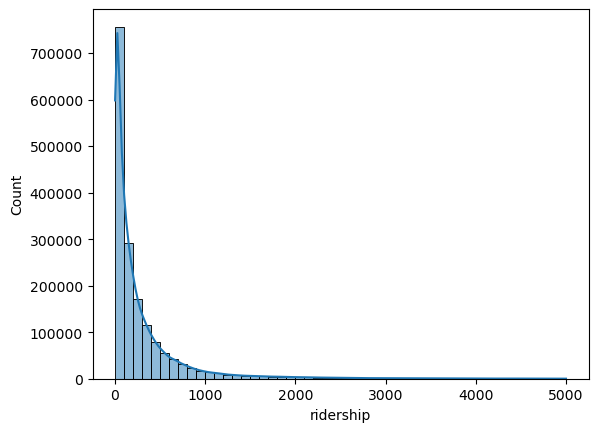

In [71]:
sns.histplot(low_ridership.ridership, kde=True, bins=50);

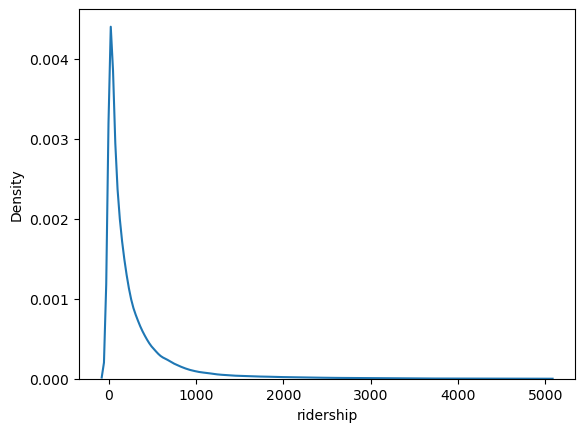

In [72]:
sns.kdeplot(low_ridership.ridership);

In [64]:
low_ridership.station_complex.unique()

array(['Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)',
       'Grand Central-42 St (S,4,5,6,7)',
       '59 St-Columbus Circle (A,B,C,D,1)',
       '14 St-Union Sq (L,N,Q,R,W,4,5,6)',
       'Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)',
       '74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)',
       'Lexington Av-53 St (E,M)/51 St (6)',
       '47-50 Sts-Rockefeller Center (B,D,F,M)',
       '34 St-Herald Sq (B,D,F,M,N,Q,R,W)', 'Fulton St (A,C,J,Z,2,3,4,5)',
       'Flushing-Main St (7)', '34 St-Penn Station (A,C,E)',
       '34 St-Penn Station (1,2,3)', '5 Av-53 St (E,M)',
       'Lexington Av (N,R,W)/59 St (4,5,6)', 'Canal St (J,N,Q,R,W,Z,6)',
       'Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)',
       '14 St (A,C,E)/8 Av (L)', '161 St-Yankee Stadium (B,D,4)',
       'Mets-Willets Point (7)', '14 St (F,M,1,2,3)/6 Av (L)',
       '86 St (4,5,6)', 'Coney Island-Stillwell Av (D,F,N,Q)',
       'Jay St-MetroTech (A,C,F,R)', 'Forest Hill